   #                   PROJECT TITLE: World Cup 2023 Data Analysis

The World Cup 2023 Data Analysis project aims to delve into the cricketing world, specifically focusing
on the performance of teams and players during the prestigious tournament. The dataset provided
encapsulates a comprehensive array of features, offering an opportunity for you to conduct a thorough
exploratory data analysis (EDA) and extract valuable insights.

## PROBLEM STATEMENT

- performing a detailed exploratory data analysis on the World Cup 2023 dataset. 

- goal: to uncover patterns, trends, and notable statistics that provide a delicate understanding of team and player performance. 

- The analysis should encompass both batting and bowling aspects, considering key metrics such as runs, wickets, strike rate, economy rate, and other relevant factors.

# IMPORTING LIBRARIES

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("C:/Users/Sharmeen/Downloads/CWC23_all_innings.csv")

In [74]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


## DATA PREPROCESSING

In [75]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

## Renaming columns for better understanding

In [76]:
df.rename(columns = {'mdns':'maidens','econ':'economy_rate','inns':'innings','sr':'strike_rate','wkts':'wickets','bb_bf':'ballsbowled_ballsfaced'},inplace = True) 

In [77]:
df

,team,player,bat_or_bowl,ballsbowled_ballsfaced,runs,wickets,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,maidens,economy_rate,innings,4s,6s,strike_rate,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


## IMPUTING MISSING VALUES

In [78]:
# Impute missing values in numerical columns with zeros
columns_to_impute = ["overs", "economy_rate", "strike_rate"]
df[columns_to_impute] = df[columns_to_impute].fillna(0)

In [79]:
# Impute missing values in the 'wickets' column with the mode
df['wickets'].fillna(df['wickets'].mode()[0], inplace=True)

In [80]:
# Impute missing values with median
df['maidens'].fillna(df['maidens'].median(), inplace=True)
df['innings'].fillna(df['innings'].median(), inplace=True)
df['not_out'].fillna(df['not_out'].median(), inplace=True)
df['4s'].fillna(df['4s'].median(), inplace=True)
df['6s'].fillna(df['6s'].median(), inplace=True)

In [81]:
df['mins'].fillna(df['mins'].median(), inplace=True)

In [82]:
df.isnull().sum()

team                      0
player                    0
bat_or_bowl               0
ballsbowled_ballsfaced    0
runs                      0
wickets                   0
wicketball_prob           0
runs_per_ball             0
opposition                0
ground                    0
start_date                0
overs                     0
maidens                   0
economy_rate              0
innings                   0
4s                        0
6s                        0
strike_rate               0
not_out                   0
mins                      0
dtype: int64

# EXPLORATORY DATA ANALYSIS

# 1. TEAM PERFORMANCE ANALYSIS

## visualizing team performance

<Axes: xlabel='team', ylabel='count'>

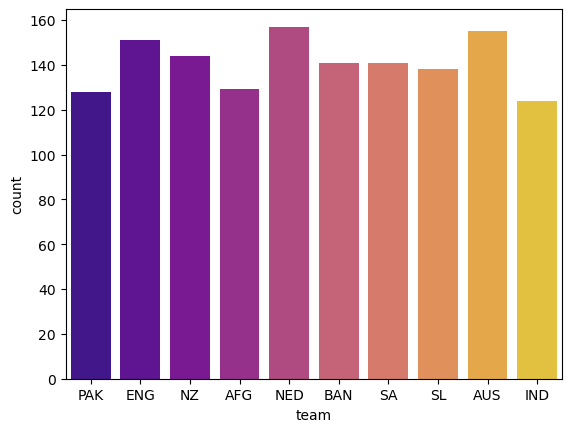

In [83]:
import seaborn as sns
sns.countplot(x="team",data=df,palette="plasma")

As seen from above bar plot, team NED(Netherlands) emerged as the top performing team in terms of overall statistics covering all aspects

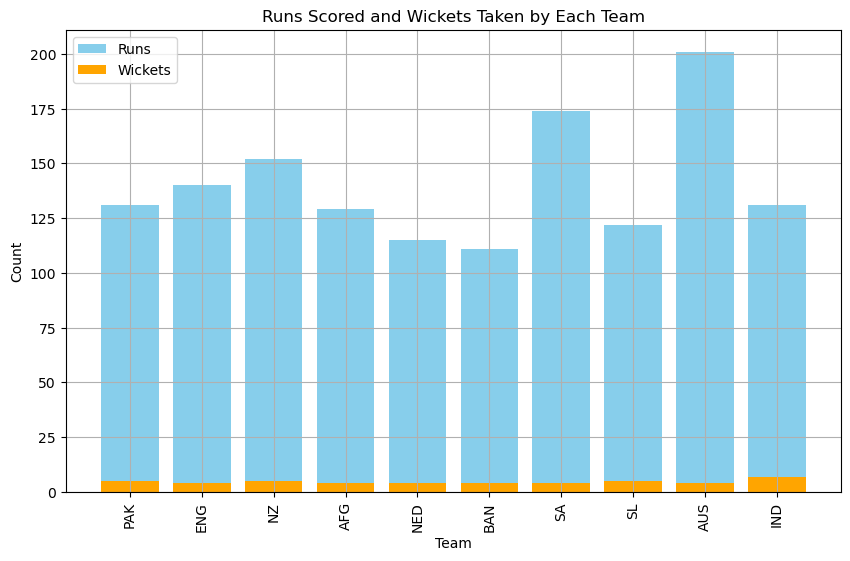

In [84]:
plt.figure(figsize=(10, 6))
# Plotting runs scored
plt.bar(df['team'], df['runs'], color='skyblue', label='Runs')

# Plotting wickets taken
plt.bar(df['team'], df['wickets'], color='orange', label='Wickets')

plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Runs Scored and Wickets Taken by Each Team')
plt.xticks(rotation=90)  
plt.legend()  
plt.grid(True)  

## COMPUTING TEAM PERFORMANCE BY GROUPBY FUNC TO ANALYZE MAX NO. OF WICKETS BY TEAM

In [85]:
team_performance = df.groupby('team').agg({'runs': 'sum', 'wickets': 'sum'}).reset_index()

# Display the DataFrame
print(team_performance)

  team  runs  wickets
0  AFG  4134     53.0
1  AUS  5234     77.0
2  BAN  4358     51.0
3  ENG  4396     65.0
4  IND  4783     94.0
5  NED  4268     63.0
6   NZ  5376     71.0
7  PAK  4786     65.0
8   SA  5097     88.0
9   SL  4366     50.0


### As clearly seen from the above plot and the comparison, the team INDIA leads in taking the highest no. of wickets for 4783 runs

# 2A) PLAYER PERFORMANCE ANALYSIS WITH BATTING STYLES

## CREATING BATTING STYLES BY GROUPING 4s and 6s for TEAM

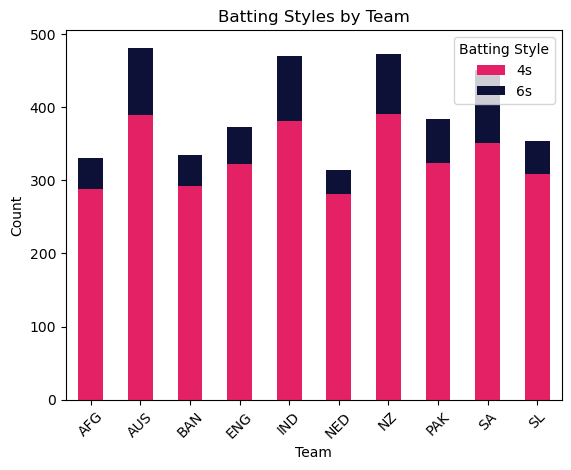

In [86]:
batting_styles = df.groupby('team')[['4s', '6s']].sum()

# Plotting
colors = ['#e52165','#0d1137']
batting_styles.plot(kind='bar', stacked=True,color=colors)
plt.title('Batting Styles by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Batting Style')
plt.show()

In [87]:
batting_styles = df.groupby('team').agg({'4s': 'sum', '6s': 'sum'}).reset_index()

# Display the DataFrame
print(batting_styles)

  team     4s    6s
0  AFG  288.0  42.0
1  AUS  389.0  92.0
2  BAN  292.0  43.0
3  ENG  322.0  51.0
4  IND  381.0  89.0
5  NED  281.0  33.0
6   NZ  391.0  82.0
7  PAK  324.0  60.0
8   SA  351.0  99.0
9   SL  309.0  45.0


In [108]:
# Calculate the total number of 4s and 6s
batting_styles['total'] = batting_styles['4s'] + batting_styles['6s']

# Calculate the ratio of 4s to 6s
batting_styles['ratio'] = batting_styles['4s'] / batting_styles['6s']

# Find the team with the highest total number of 4s and 6s
max_4s_6s_team = batting_styles.loc[batting_styles['total'].idxmax(), 'team']

# Find the team with the highest ratio of 4s to 6s
max_ratio_team = batting_styles.loc[batting_styles['ratio'].idxmax(), 'team']

print("Team with the highest total 4s and 6s:", max_4s_6s_team)
print("Team with the highest ratio of 4s to 6s:", max_ratio_team)

Team with the highest total 4s and 6s: AUS
Team with the highest ratio of 4s to 6s: NED


# 2B) PLAYER PERFORMANCE ANALYSIS BY BOWLING STYLES

## CREATING BOWLING STYLES BY GROUPING wickets,economy_rate, strike_rate for TEAM

In [89]:
# Group by 'team' and sum up the relevant columns
bowling_styles = df.groupby('team')[['wickets', 'economy_rate', 'strike_rate']].sum()

# Reset the index to make 'team' a regular column again
bowling_styles.reset_index(inplace=True)

# Calculate the total score based on the sum of wickets, economy_rate, and strike_rate
bowling_styles['total'] = bowling_styles['wickets'] + bowling_styles['economy_rate'] + bowling_styles['strike_rate']

# Find the team with the highest total score
max_total_team = bowling_styles.loc[bowling_styles['total'].idxmax(), 'team']

print("Team with the highest total score:", max_total_team)

Team with the highest total score: ENG


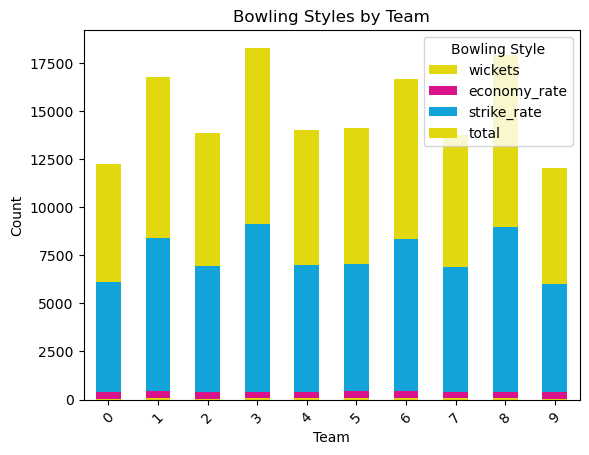

In [90]:
# Plotting
colors = ['#e2d810', '#d9138a', '#12a4d9']
bowling_styles.plot(kind='bar', stacked=True,color=colors)
plt.title('Bowling Styles by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Bowling Style')
plt.show()

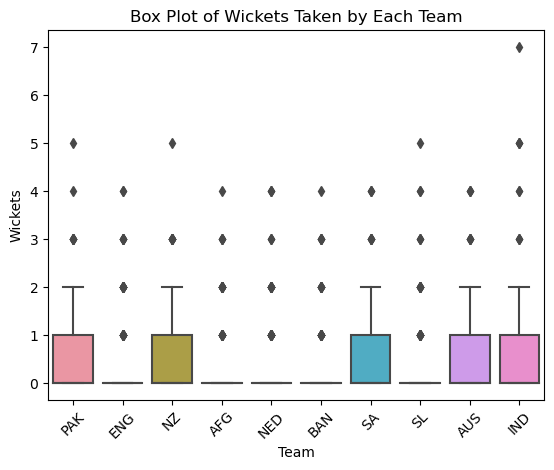

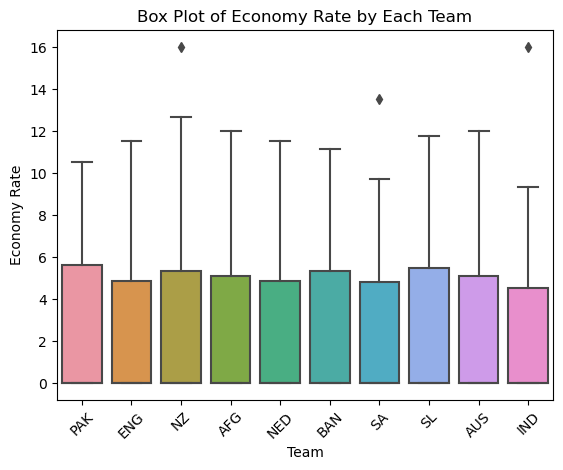

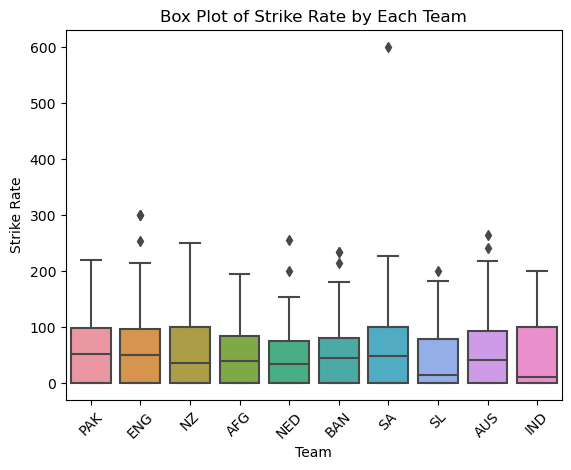

In [91]:
# Box plot for wickets
sns.boxplot(x='team', y='wickets', data=df)
plt.title('Box Plot of Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Box plot for economy rate
sns.boxplot(x='team', y='economy_rate', data=df)
plt.title('Box Plot of Economy Rate by Each Team')
plt.xlabel('Team')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.show()

# Box plot for strike rate
sns.boxplot(x='team', y='strike_rate', data=df)
plt.title('Box Plot of Strike Rate by Each Team')
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()

In [92]:
bowling_styles

,team,wickets,economy_rate,strike_rate,total
0,AFG,53.0,317.01,5745.98,6115.99
1,AUS,77.0,350.99,7958.13,8386.12
2,BAN,51.0,316.98,6569.27,6937.25
3,ENG,65.0,321.62,8761.94,9148.56
4,IND,94.0,287.90,6617.13,6999.03
5,NED,63.0,364.05,6639.31,7066.36
6,NZ,71.0,392.94,7860.37,8324.31
7,PAK,65.0,326.92,6496.43,6888.35
8,SA,88.0,306.87,8564.56,8959.43
9,SL,50.0,356.73,5611.12,6017.85


## As seen from bowling styles breakdown, team ENG leads in scoring the highest total of 9148 

### COMPARISON OF BATTING AND BOWLING STYLES

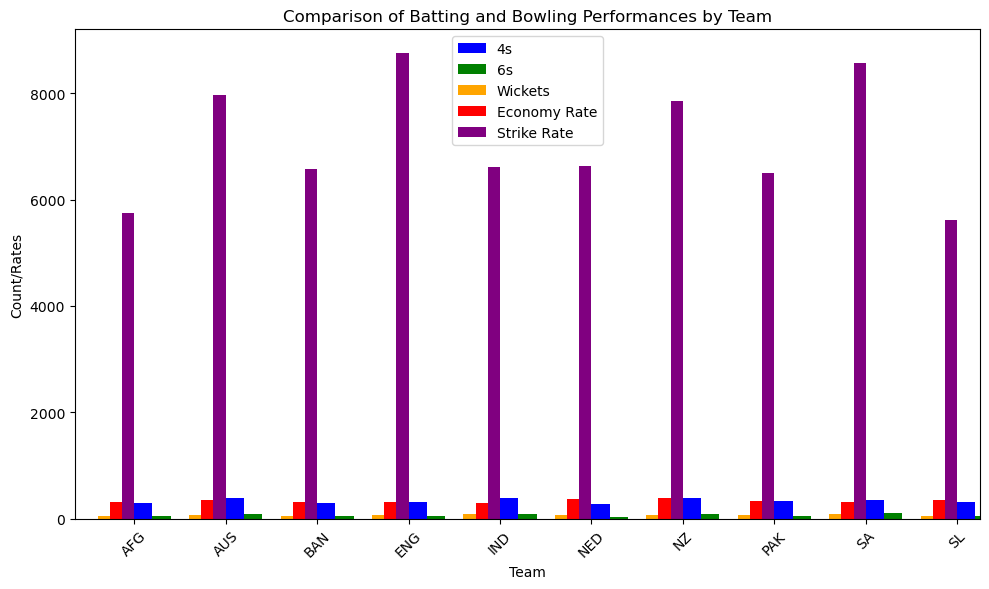

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))


batting_styles.plot(kind='bar', x='team', y=['4s', '6s'], ax=ax, color=['blue', 'green'], width=0.4, position=0, label=['4s', '6s'])


bowling_styles.plot(kind='bar', x='team', y=['wickets', 'economy_rate', 'strike_rate'], ax=ax, color=['orange', 'red', 'purple'], width=0.4, position=1, label=['Wickets', 'Economy Rate', 'Strike Rate'])


plt.xlabel('Team')
plt.ylabel('Count/Rates')
plt.title('Comparison of Batting and Bowling Performances by Team')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# 3) OVERALL PERFORMANCE ANALYSIS

In [94]:
# Calculate total 4s and 6s for each team from batting_stats
total_4s = batting_styles.groupby('team')['4s'].sum()
total_6s = batting_styles.groupby('team')['6s'].sum()

# Calculate total wickets for each team from bowling_stats
total_wickets = bowling_styles.groupby('team')['wickets'].sum()

# Combine the calculated statistics into a single DataFrame
overall_performance = pd.DataFrame({'total_4s': total_4s, 'total_6s': total_6s, 'total_wickets': total_wickets})

# Reset the index to make 'team' a column instead of an index
overall_performance.reset_index(inplace=True)

In [95]:
overall_performance

,team,total_4s,total_6s,total_wickets
0,AFG,288.0,42.0,53.0
1,AUS,389.0,92.0,77.0
2,BAN,292.0,43.0,51.0
3,ENG,322.0,51.0,65.0
4,IND,381.0,89.0,94.0
5,NED,281.0,33.0,63.0
6,NZ,391.0,82.0,71.0
7,PAK,324.0,60.0,65.0
8,SA,351.0,99.0,88.0
9,SL,309.0,45.0,50.0


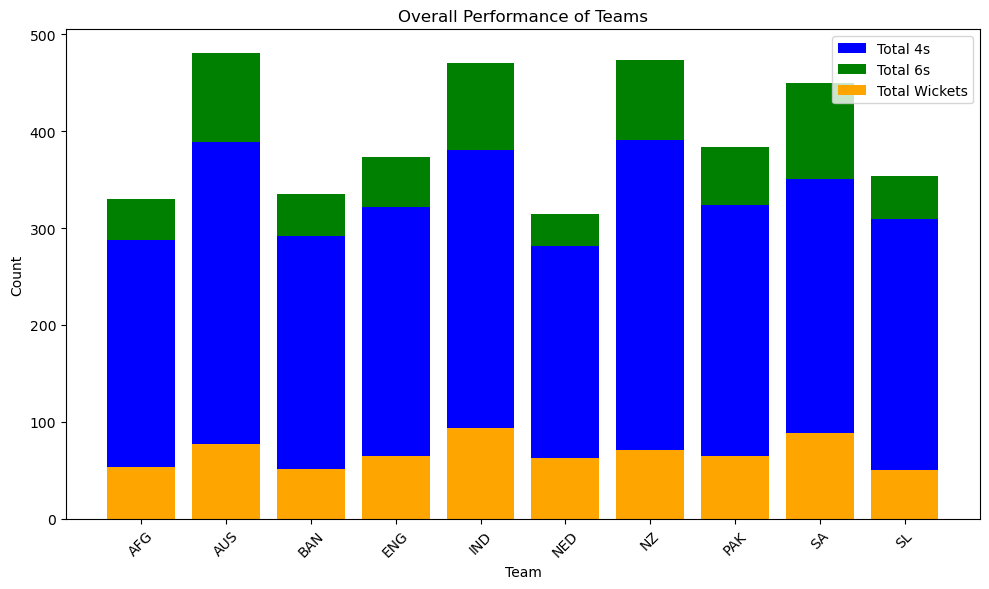

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(overall_performance['team'], overall_performance['total_4s'], color='blue', label='Total 4s')


ax.bar(overall_performance['team'], overall_performance['total_6s'], bottom=overall_performance['total_4s'], color='green', label='Total 6s')


ax.bar(overall_performance['team'], overall_performance['total_wickets'], color='orange', label='Total Wickets')

# Set labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Count')
ax.set_title('Overall Performance of Teams')
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [97]:
# Calculate a combined performance metric (e.g., total runs scored minus total wickets taken)
overall_performance['combined_metric'] = overall_performance['total_4s'] + overall_performance['total_6s'] - overall_performance['total_wickets']

# Sort the DataFrame by the combined metric in descending order to get the top-performing teams first
overall_performance_sorted = overall_performance.sort_values(by='combined_metric', ascending=False)

# Display the sorted DataFrame
print(overall_performance_sorted)

  team  total_4s  total_6s  total_wickets  combined_metric
1  AUS     389.0      92.0           77.0            404.0
6   NZ     391.0      82.0           71.0            402.0
4  IND     381.0      89.0           94.0            376.0
8   SA     351.0      99.0           88.0            362.0
7  PAK     324.0      60.0           65.0            319.0
3  ENG     322.0      51.0           65.0            308.0
9   SL     309.0      45.0           50.0            304.0
2  BAN     292.0      43.0           51.0            284.0
0  AFG     288.0      42.0           53.0            277.0
5  NED     281.0      33.0           63.0            251.0


### AS SEEN FROM STATISTICS ABOVE, AUSTRALIA RANKS THE HIGHEST IN TOP PERFORMANCE ON OVERALL PERFORMANCE METRIC

# 4) OPPOSITION AND GROUND ANALYSIS

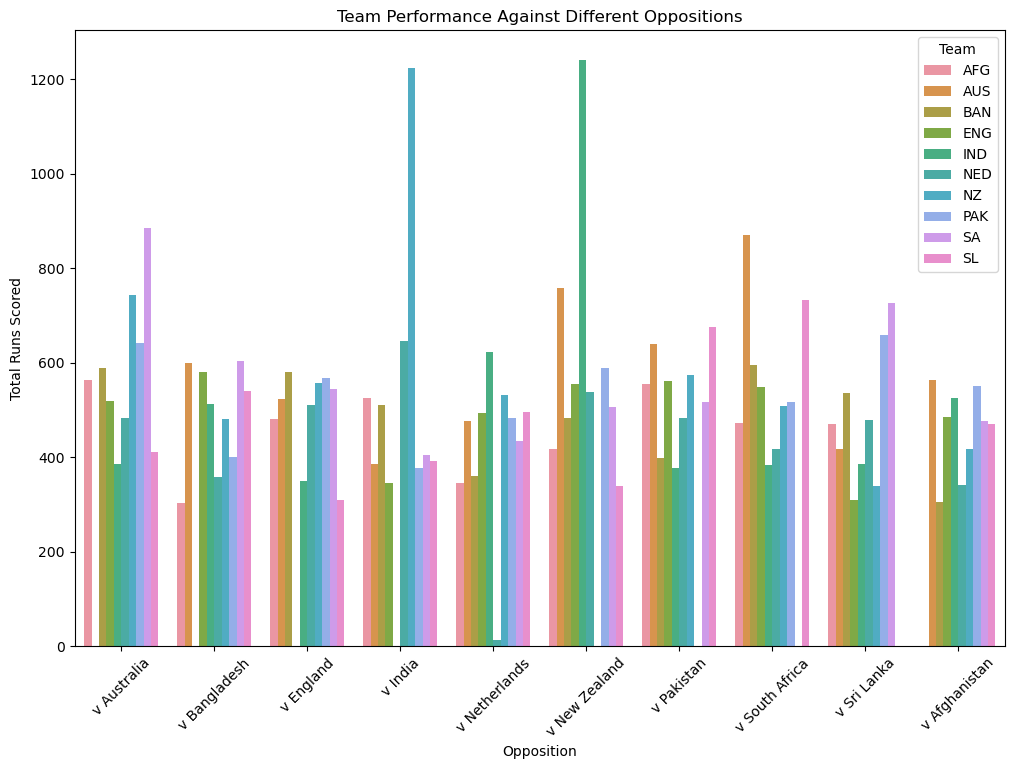

In [98]:
# Opposition Analysis
team_opposition_stats = df.groupby(['team', 'opposition']).agg({'runs': 'sum', 'wickets': 'sum'}).reset_index()

# Visualize Team Performance Against Different Oppositions
plt.figure(figsize=(12, 8))
sns.barplot(x='opposition', y='runs', hue='team', data=team_opposition_stats)
plt.title('Team Performance Against Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

In [99]:
# Sum of runs and wickets for each team across different oppositions
team_stats = team_opposition_stats.groupby('team').agg({
    'runs': 'sum',
    'wickets': 'sum'
}).reset_index()

# Calculate total runs and wickets for each team
team_stats['total_runs'] = team_stats['runs']
team_stats['total_wickets'] = team_stats['wickets']

# Sort the DataFrame in descending order based on total runs and wickets
team_stats = team_stats.sort_values(by=['total_runs', 'total_wickets'], ascending=False)

# Display the comparison table
print(team_stats)

  team  runs  wickets  total_runs  total_wickets
6   NZ  5376     71.0        5376           71.0
1  AUS  5234     77.0        5234           77.0
8   SA  5097     88.0        5097           88.0
7  PAK  4786     65.0        4786           65.0
4  IND  4783     94.0        4783           94.0
3  ENG  4396     65.0        4396           65.0
9   SL  4366     50.0        4366           50.0
2  BAN  4358     51.0        4358           51.0
5  NED  4268     63.0        4268           63.0
0  AFG  4134     53.0        4134           53.0


#### When sorting by total runs, opposition against team NEW ZEALAND proves out to be scoring the highest no. of runs

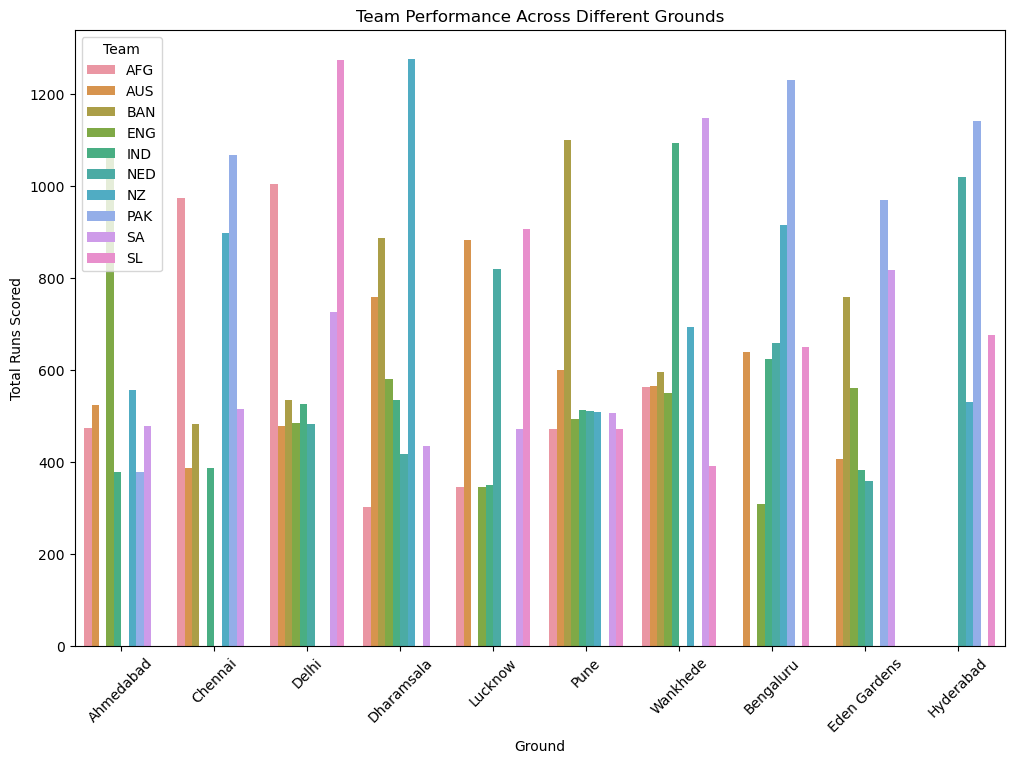

In [100]:
# Ground Analysis
team_ground_stats = df.groupby(['team', 'ground']).agg({'runs': 'sum', 'wickets': 'sum'}).reset_index()

# Visualize Team Performance Across Different Grounds
plt.figure(figsize=(12, 8))
sns.barplot(x='ground', y='runs', hue='team', data=team_ground_stats)
plt.title('Team Performance Across Different Grounds')
plt.xlabel('Ground')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

C:\Users\Sharmeen\AppData\Local\Temp\ipykernel_32460\1673439736.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  team_ground_pivot = team_ground_stats.pivot('team', 'ground', 'runs')


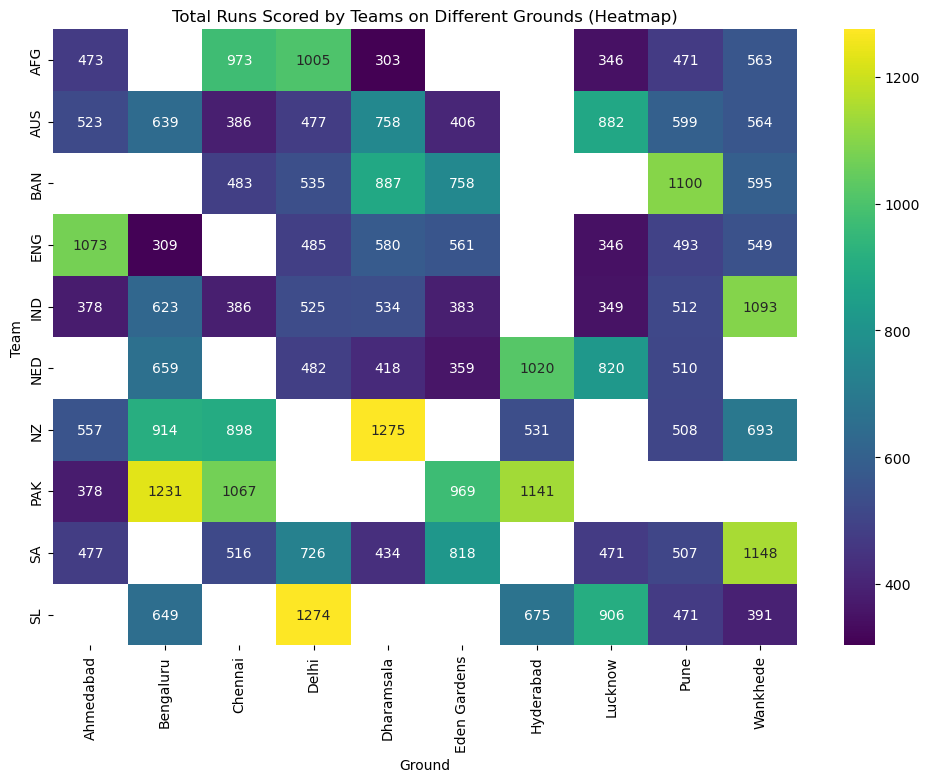

In [101]:
# Plotting using a heatmap
team_ground_pivot = team_ground_stats.pivot('team', 'ground', 'runs')
plt.figure(figsize=(12, 8))
sns.heatmap(team_ground_pivot, cmap='viridis', annot=True, fmt='g')
plt.title('Total Runs Scored by Teams on Different Grounds (Heatmap)')
plt.xlabel('Ground')
plt.ylabel('Team')
plt.show()

## The heatmap visualization proves to be effectively showcasing the highest runs scored by teams in various playing grounds, as clearly seen, team NEW ZEALAND, SRI LANKA and PAKISTAN emerge as the highest run scorers in grounds of Dharamshala, Delhi and Bengaluru respectively

# INDIVIDUAL PLAYER ANALYSIS

C:\Users\Sharmeen\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


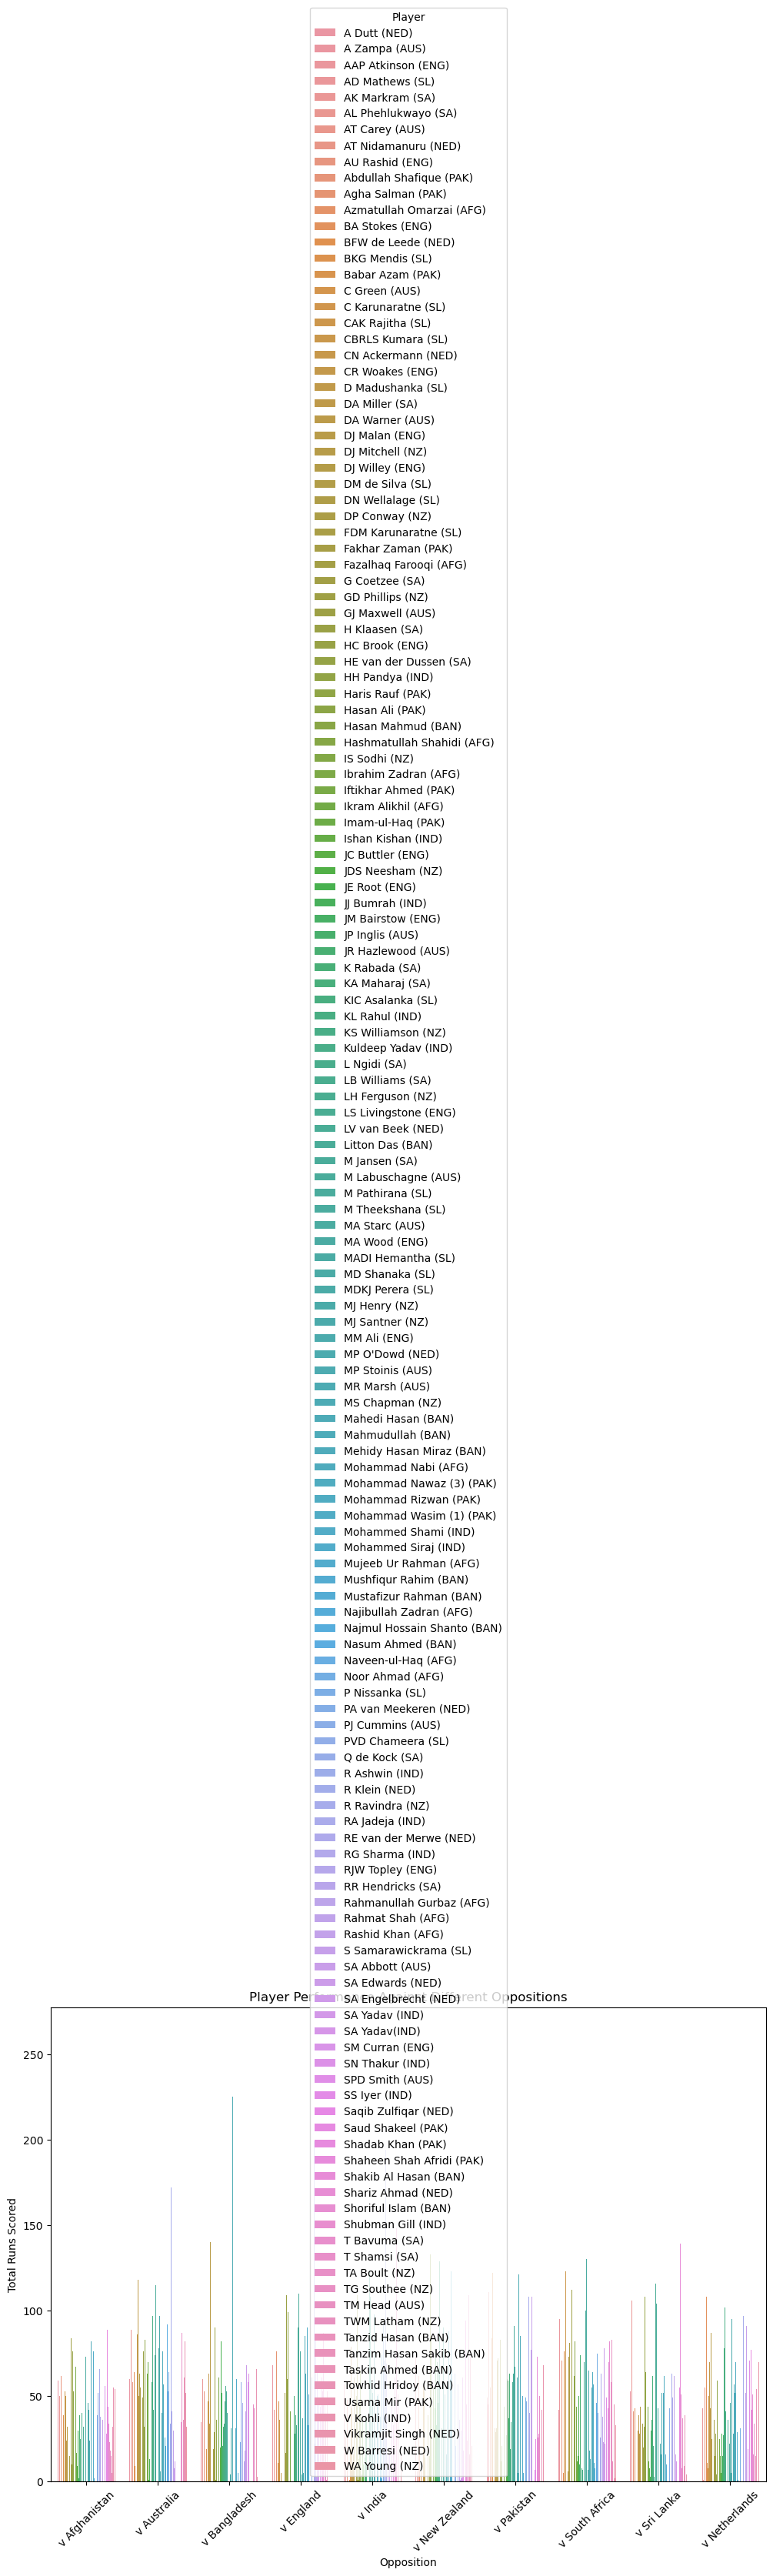

In [102]:
# Player Analysis
player_opposition_stats = df.groupby(['player', 'opposition']).agg({'runs': 'sum', 'wickets': 'sum'}).reset_index()

# Visualize Player Performance Against Different Oppositions
plt.figure(figsize=(12, 8))
sns.barplot(x='opposition', y='runs', hue='player', data=player_opposition_stats)
plt.title('Player Performance Against Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Player')
plt.show()

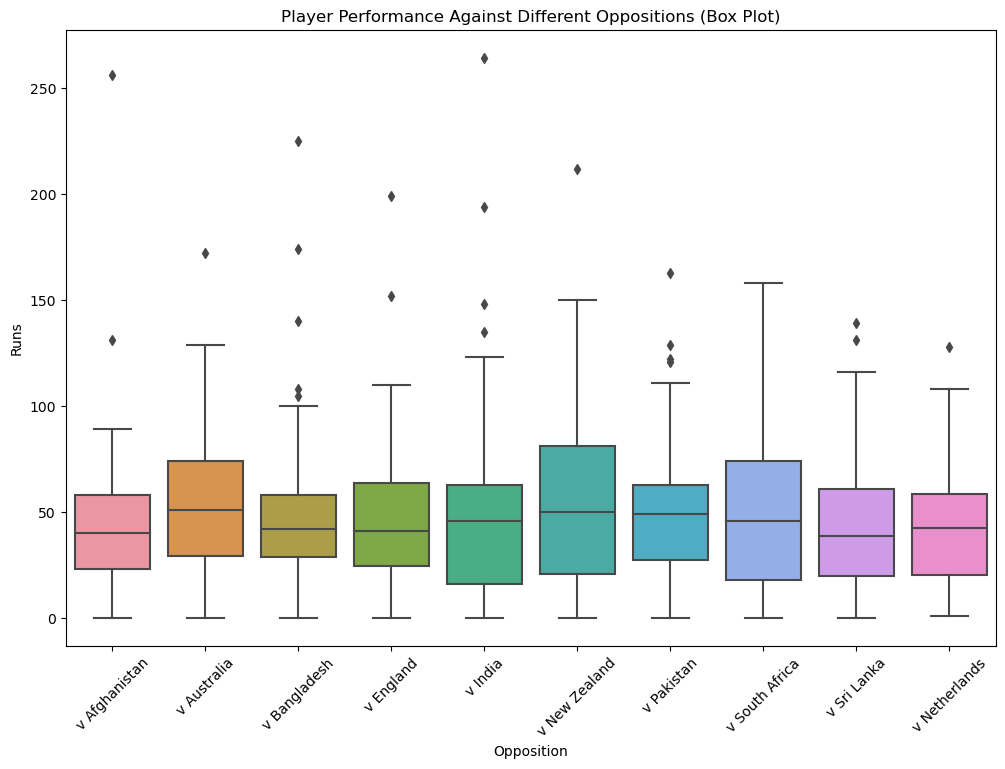

In [103]:
# Player analysis against different oppositions (using box plot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='opposition', y='runs', data=player_opposition_stats)
plt.title('Player Performance Against Different Oppositions (Box Plot)')
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

# STATISTICAL ANALYSIS FOR TEAM AND OPPOSITION

In [104]:
# Aggregate statistics for team performance against different oppositions
team_opposition_stats = df.groupby(['team', 'opposition']).agg({
    'runs': ['mean', 'median', 'std', 'min', 'max'],
    'wickets': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

# Aggregate statistics for team performance across different grounds
team_ground_stats = df.groupby(['team', 'ground']).agg({
    'runs': ['mean', 'median', 'std', 'min', 'max'],
    'wickets': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

# Aggregate statistics for player performance against different oppositions
player_opposition_stats1 = df.groupby(['player', 'opposition']).agg({
    'runs': ['mean', 'median', 'std', 'min', 'max'],
    'wickets': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

In [105]:
team_opposition_stats

team      opposition       runs                              wickets  \
                              mean median        std min  max      mean   
0   AFG     v Australia  43.307692   35.0  30.782529  12  129  0.461538   
1   AFG    v Bangladesh  18.937500   18.0  14.516514   0   48  0.187500   
2   AFG       v England  28.235294   23.0  22.100705   2   80  0.588235   
3   AFG         v India  32.812500   26.5  23.074427   2   80  0.125000   
4   AFG   v Netherlands  31.454545   31.0  14.631224  10   56  0.545455   
..  ...             ...        ...    ...        ...  ..  ...       ...   
86   SL         v India  23.000000   11.0  30.101910   0   80  0.352941   
87   SL   v Netherlands  38.076923   44.0  24.968185   4   91  0.692308   
88   SL   v New Zealand  21.187500   19.0  18.111575   1   58  0.250000   
89   SL      v Pakistan  39.705882   28.0  39.070073   0  122  0.235294   
90   SL  v South Africa  43.117647   36.0  36.024093   0   95  0.294118   

                               
   median       std  min  max  
0     0.0  0.877058  0.0  2.0  
1     0.0  0.403113  0.0  1.0  
2     0.0  1.064121  0.0  3.0  
3     0.0  0.500000  0.0  2.0  
4     0.0  1.035725  0.0  3.0  
..    ...       ...  ...  ...  
86    0.0  1.221739  0.0  5.0  
87    0.0  1.493576  0.0  4.0  
88    0.0  0.577350  0.0  2.0  
89    0.0  0.562296  0.0  2.0  
90    0.0  0.587868  0.0  2.0  

[91 rows x 12 columns]

## As seen above, the team AFG when played against Australia shows the maximum run scorer with 129 runs

In [106]:
team_ground_stats

team      ground       runs                              wickets         \
                          mean median        std min  max      mean median   
0   AFG   Ahmedabad  26.277778   20.0  24.381298   2   97  0.277778    0.0   
1   AFG     Chennai  36.037037   41.0  23.915688   0   87  0.481481    0.0   
2   AFG       Delhi  30.454545   23.0  22.342631   2   80  0.363636    0.0   
3   AFG  Dharamsala  18.937500   18.0  14.516514   0   48  0.187500    0.0   
4   AFG     Lucknow  31.454545   31.0  14.631224  10   56  0.545455    0.0   
..  ...         ...        ...    ...        ...  ..  ...       ...    ...   
67   SL       Delhi  38.606061   35.0  32.426782   0  108  0.363636    0.0   
68   SL   Hyderabad  39.705882   28.0  39.070073   0  122  0.235294    0.0   
69   SL     Lucknow  31.241379   30.0  25.304792   0   91  0.448276    0.0   
70   SL        Pune  29.437500   26.0  17.064461   1   55  0.187500    0.0   
71   SL    Wankhede  23.000000   11.0  30.101910   0   80  0.352941    0.0   

                        
         std  min  max  
0   0.669113  0.0  2.0  
1   0.848998  0.0  3.0  
2   0.859440  0.0  3.0  
3   0.403113  0.0  1.0  
4   1.035725  0.0  3.0  
..       ...  ...  ...  
67  0.783349  0.0  3.0  
68  0.562296  0.0  2.0  
69  1.152209  0.0  4.0  
70  0.543906  0.0  2.0  
71  1.221739  0.0  5.0  

[72 rows x 12 columns]

In [107]:
player_opposition_stats1

player      opposition  runs                           wickets  \
                                    mean median        std min max    mean   
0     A Dutt (NED)   v Afghanistan  29.5   29.5  27.577164  10  49     0.0   
1     A Dutt (NED)     v Australia  30.0   30.0  41.012193   1  59     0.5   
2     A Dutt (NED)    v Bangladesh  17.5   17.5  12.020815   9  26     0.5   
3     A Dutt (NED)       v England  34.0   34.0  46.669048   1  67     1.0   
4     A Dutt (NED)         v India  28.5   28.5  33.234019   5  52     0.0   
..             ...             ...   ...    ...        ...  ..  ..     ...   
973  WA Young (NZ)     v Australia  32.0   32.0        NaN  32  32     0.0   
974  WA Young (NZ)       v England   0.0    0.0        NaN   0   0     0.0   
975  WA Young (NZ)         v India  17.0   17.0        NaN  17  17     0.0   
976  WA Young (NZ)   v Netherlands  70.0   70.0        NaN  70  70     0.0   
977  WA Young (NZ)  v South Africa  33.0   33.0        NaN  33  33     0.0   

                                
    median       std  min  max  
0      0.0  0.000000  0.0  0.0  
1      0.5  0.707107  0.0  1.0  
2      0.5  0.707107  0.0  1.0  
3      1.0  1.414214  0.0  2.0  
4      0.0  0.000000  0.0  0.0  
..     ...       ...  ...  ...  
973    0.0       NaN  0.0  0.0  
974    0.0       NaN  0.0  0.0  
975    0.0       NaN  0.0  0.0  
976    0.0       NaN  0.0  0.0  
977    0.0       NaN  0.0  0.0  

[978 rows x 12 columns]

# 5) TEMPORAL ANALYSIS

In [113]:
df.dtypes

team                       object
player                     object
bat_or_bowl                object
ballsbowled_ballsfaced      int64
runs                        int64
wickets                   float64
wicketball_prob           float64
runs_per_ball             float64
opposition                 object
ground                     object
overs                     float64
maidens                   float64
economy_rate              float64
innings                     int64
4s                        float64
6s                        float64
strike_rate               float64
not_out                   float64
mins                      float64
dtype: object

### Changing date col to datetime dtype and making it as an index column for visualization

In [111]:
df['start_date'] = pd.to_datetime(df['start_date'])
df.set_index('start_date', inplace=True)

In [112]:
df.head()

,team,player,bat_or_bowl,ballsbowled_ballsfaced,runs,wickets,wicketball_prob,runs_per_ball,opposition,ground,overs,maidens,economy_rate,innings,4s,6s,strike_rate,not_out,mins
start_date,,,,,,,,,,,,,,,,,,,
2023-10-27,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,10.0,0.0,4.5,2,2.0,0.0,0.0,0.0,28.0
2023-10-29,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,10.0,2.0,4.5,1,2.0,0.0,0.0,0.0,28.0
2023-10-05,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,10.0,1.0,4.8,1,2.0,0.0,0.0,0.0,28.0
2023-10-13,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,10.0,0.0,4.9,1,2.0,0.0,0.0,0.0,28.0
2023-10-23,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,10.0,0.0,4.9,1,2.0,0.0,0.0,0.0,28.0


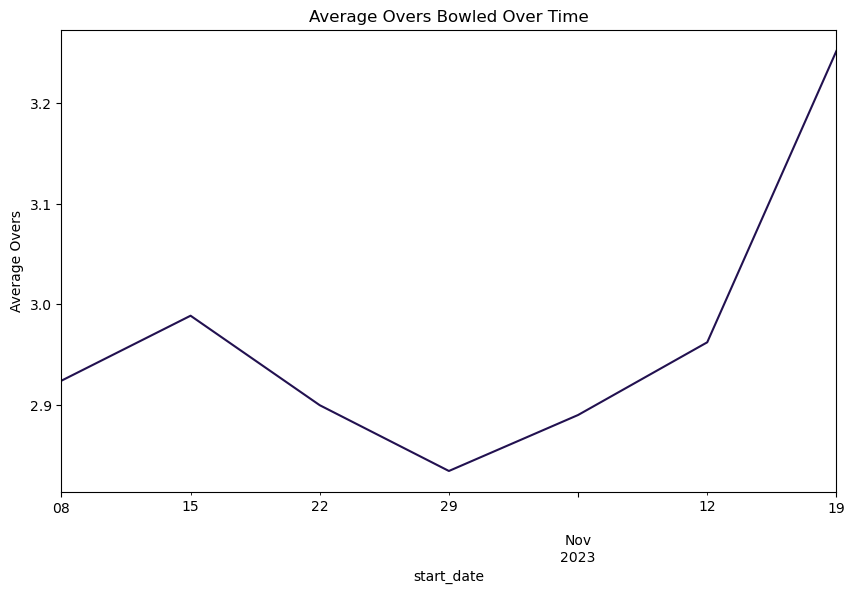

In [124]:
# Resample the DataFrame to weekly frequency and compute the mean of overs
weekly_performance = df['overs'].resample('W').mean()

# Plot the monthly performance trends
plt.figure(figsize=(10, 6))
weekly_performance.plot()
plt.title('Average Overs Bowled Over Time')
plt.ylabel('Average Overs')
plt.show()

## When resampled by weekly performance for avg overs, the plot shows decreasing trend from 15 to 29 oct and then it's increasing for next 4 weeks

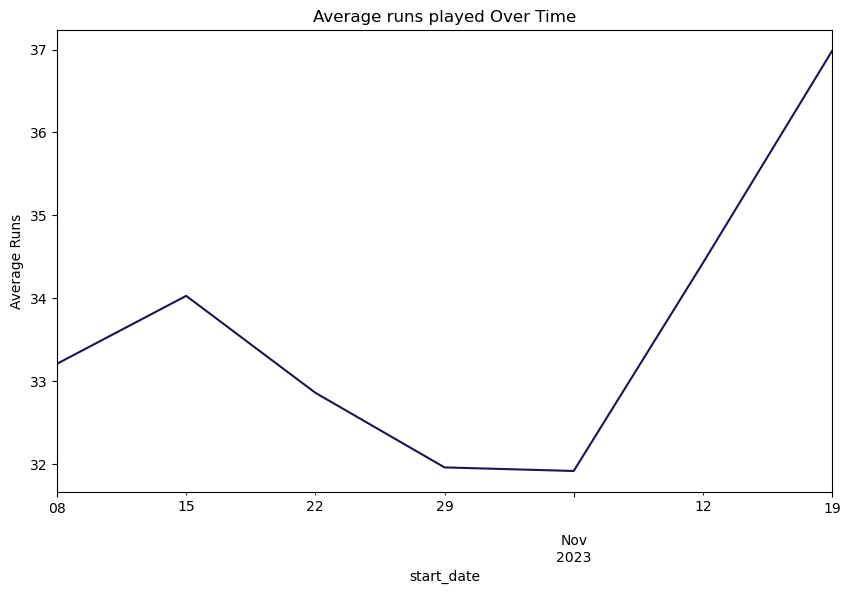

In [131]:
# Resample the DataFrame to weekly frequency and compute the mean of overs
weekly_performance = df['runs'].resample('W').mean()

# Plot the monthly performance trends
plt.figure(figsize=(10, 6))
weekly_performance.plot()
plt.title('Average runs played Over Time')
plt.ylabel('Average Runs')
plt.show()

## When resampled by weekly performance for avg runs, the plot shows decreasing trend from 15 to 29 oct and then it's increasing for next 3 weeks

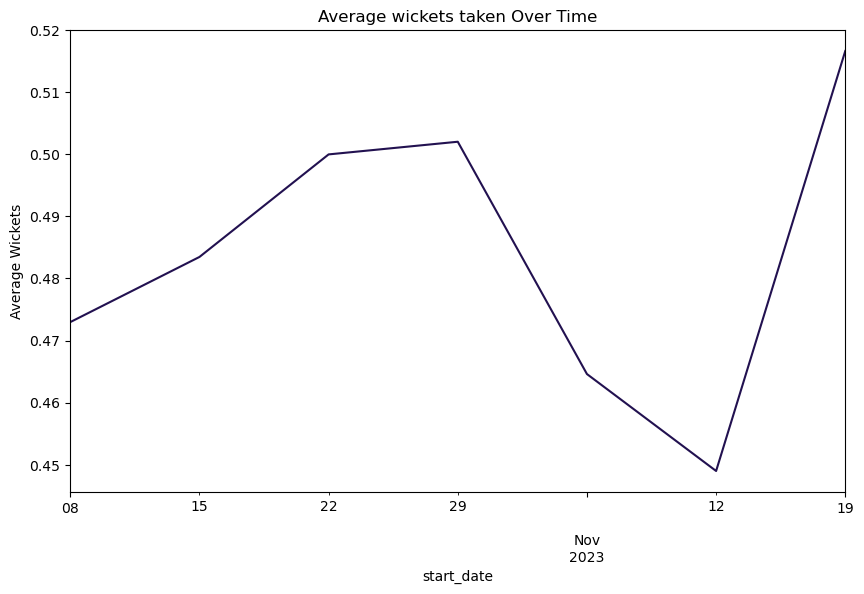

In [132]:
# Resample the DataFrame to weekly frequency and compute the mean of overs
weekly_performance = df['wickets'].resample('W').mean()

# Plot the monthly performance trends
plt.figure(figsize=(10, 6))
weekly_performance.plot()
plt.title('Average wickets taken Over Time')
plt.ylabel('Average Wickets')
plt.show()

## When resampled by weekly performance for avg wickets, the plot shows decreasing trend from 29 oct to 12 nov and then it's increasing for next 1 week

# CONCLUSION

1) Team and Player Performance Analysis:

- In-depth evaluation of team and player statistics for both batting and bowling.
- Identification of top performers based on runs scored, wickets taken, and overall impact on matches.

2) Opposition and Ground Dynamics:

- Analysis of team and player performance against different oppositions and on various playing grounds.
- Identification of teams and players excelling in specific conditions.

3) Temporal Trends:

- Examination of temporal trends by analyzing performance metrics such as overs, runs, and wickets over time.
- Identification of fluctuations and patterns in team and player performance throughout the tournament.

4) Insights and Implications:

- Insights gleaned from the analysis can be leveraged by teams and coaches to optimize strategies and improve performance.
- Understanding temporal trends can aid in tactical decision-making during matches and help teams adapt to changing game scenarios.

5) Future Directions:

- Further refinement of analysis techniques and incorporation of additional data sources can provide deeper insights into team and player dynamics.
- Continued monitoring of performance metrics over time can facilitate ongoing improvement and adaptation strategies.


In summary, the World Cup 2023 Data Analysis project offers valuable insights into cricket tournament dynamics, enabling teams to make informed decisions and enhance their competitive edge on the field.